## Sleep Health Analysis

- H0: There is no relationship between sleep duration (X) and physical fitness duration (y)
- H1: There is a statistically significant relationship between variable X and variable y.

In [29]:
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import cleaning as cl 
import importlib
importlib.reload(cl)
from scipy.stats import pearsonr


In [2]:
health = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/sleep-heath-analysis/data/Sleep_health_and_lifestyle_dataset.csv")
health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# view NA
health["Sleep Disorder"].isnull().sum()

np.int64(219)

In [5]:
# view unique to understand what NaNs are
health["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
# call function for cleaning all data
health = cl.clean_data(health)
# fill NaN values with "None"
# turn columns into lowercase
# replace " " with "_" in column nanes
# rename columns
# remove duplicates
health.head()

,id,gender,age,occupation,sleep_hours,sleep_quality,activity_min_per_day,stress_level,bmi_category,blood_pressure,rhr,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## EDA

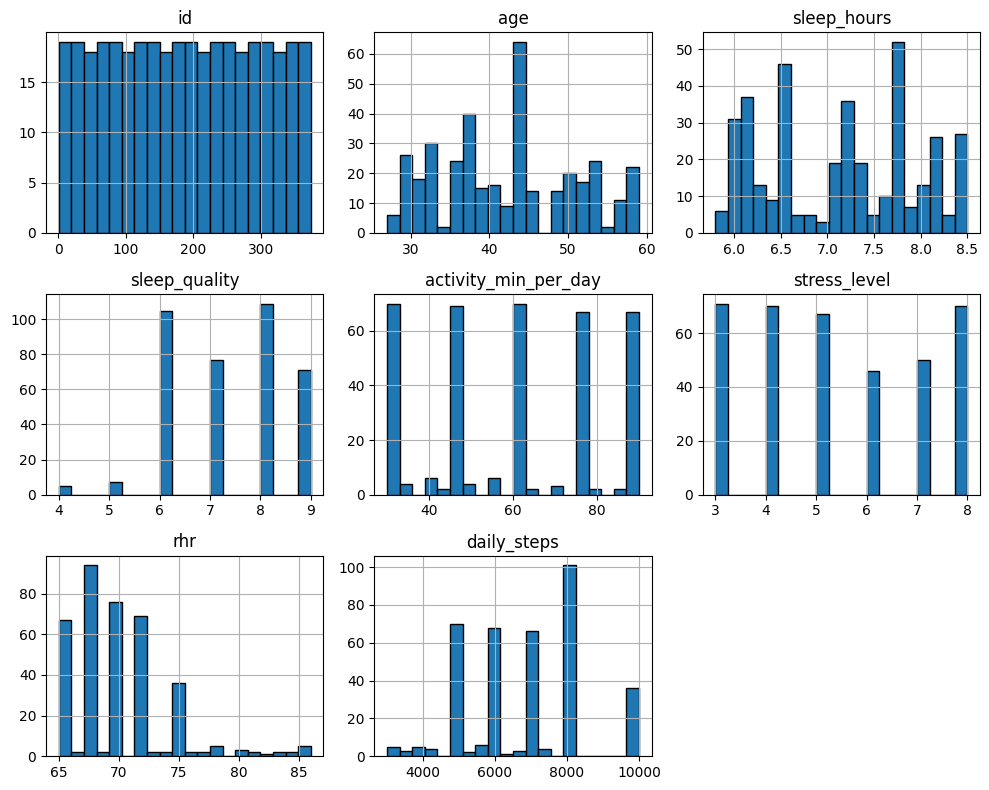

In [21]:
# all numeric histograms in one grid
health.hist(bins=20, figsize=(10, 8), edgecolor="black")
plt.tight_layout()
plt.show()

In [28]:
print("Avg. Sleep Hours: ", str(health.sleep_hours.mean().round(2)))
print("Median Sleep Hours: ", str(health.sleep_hours.median().round(2)))

Avg. Sleep Hours:  7.13
Median Sleep Hours:  7.2


### Sleep and activity

Text(0, 0.5, 'Sleep Hours per Night')

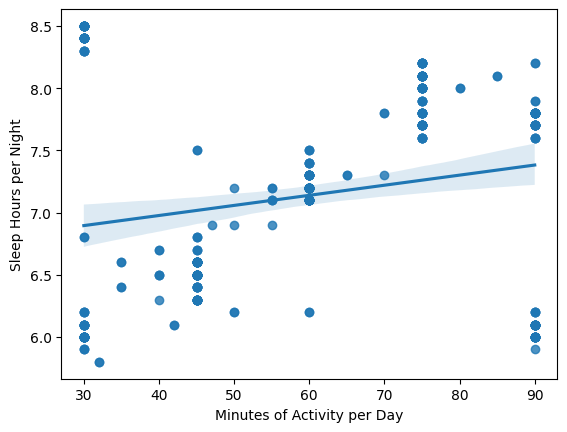

In [12]:
sns.regplot(
    data=health,
    x="activity_min_per_day",
    y="sleep_hours"
    
)
plt.xlabel("Minutes of Activity per Day")
plt.ylabel("Sleep Hours per Night")

**Observations:** 
Generally, more physical activity associates with more sleep. But the clusters suggest the data might be somewhat artificial or grouped (maybe survey categories?).

In [47]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['activity_min_per_day'], health['sleep_hours'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Activity & Sleep: ", correlation)
print("P-value, Activity & Sleep: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Activity & Sleep:  0.21236031472575906
P-value, Activity & Sleep:  3.4666184358492465e-05
r-squared:  0.04509690327042344
r-squared percent: 4.51%


**Observations:** A correlation coefficient of 0.21 shows a slightly positive relationship between the variables. Further analysis shows an r-squared of 0.04. This means only 4% of the variation in people's sleep can be attributed to activity levels. The other 96% is due to other factors. But a  A p-value well below 0.05 shows strong statistical evidence against our null hypothesis, suggesting that there is a statistically significant relationship between sleep duration and physical fitness duration.*

### Stress and sleep

Text(0, 0.5, 'Sleep Hours per Night')

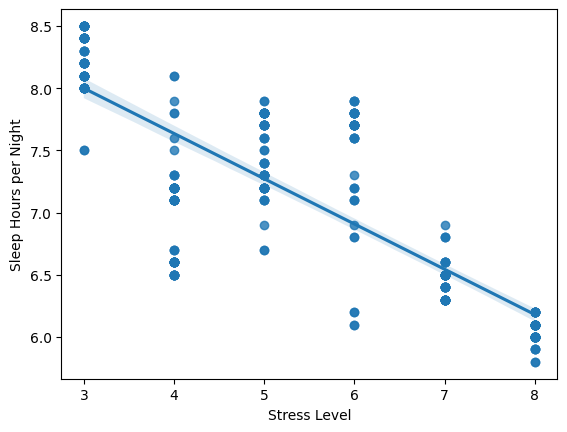

In [38]:
sns.regplot(
    data=health,
    x="stress_level",
    y="sleep_hours"
    
)
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours per Night")

Observations: Strong negative trend suggests higher stress levels are correlated with less sleep.

Text(0, 0.5, 'Minutes of Activity per Day')

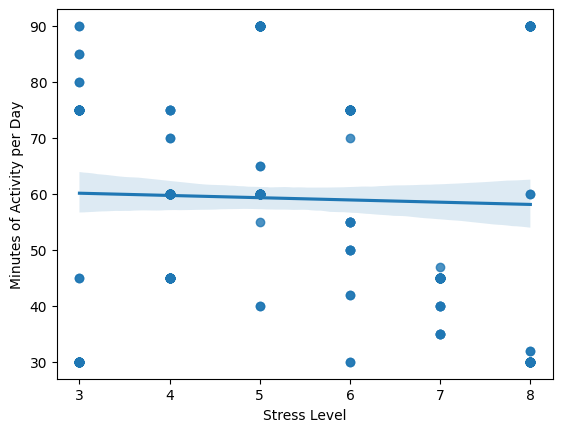

In [39]:
sns.regplot(
    data=health,
    x="stress_level",
    y="activity_min_per_day"
    
)
plt.xlabel("Stress Level")
plt.ylabel("Minutes of Activity per Day")

Observation: There is no correlation between activity and stress. This increases the likelyhood that, despite other variables, activity levels directly impacts sleep duration.  

In [40]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    374 non-null    int64  
 1   gender                374 non-null    object 
 2   age                   374 non-null    int64  
 3   occupation            374 non-null    object 
 4   sleep_hours           374 non-null    float64
 5   sleep_quality         374 non-null    int64  
 6   activity_min_per_day  374 non-null    int64  
 7   stress_level          374 non-null    int64  
 8   bmi_category          374 non-null    object 
 9   blood_pressure        374 non-null    object 
 10  rhr                   374 non-null    int64  
 11  daily_steps           374 non-null    int64  
 12  sleep_disorder        374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [41]:
# Pick predictors and outcome
features = ["age", "sleep_quality", "activity_min_per_day", "stress_level", "bmi_category", 
            "blood_pressure", "rhr", "daily_steps", "sleep_disorder"]
outcome = "sleep_hours"

# Calculate correlations with outcome
correlations = health[features + [outcome]].corr(numeric_only=True)[outcome].sort_values(ascending=False)

print(correlations)

sleep_hours             1.000000
sleep_quality           0.883213
age                     0.344709
activity_min_per_day    0.212360
daily_steps            -0.039533
rhr                    -0.516455
stress_level           -0.811023
Name: sleep_hours, dtype: float64


Text(0, 0.5, 'sleep hours')

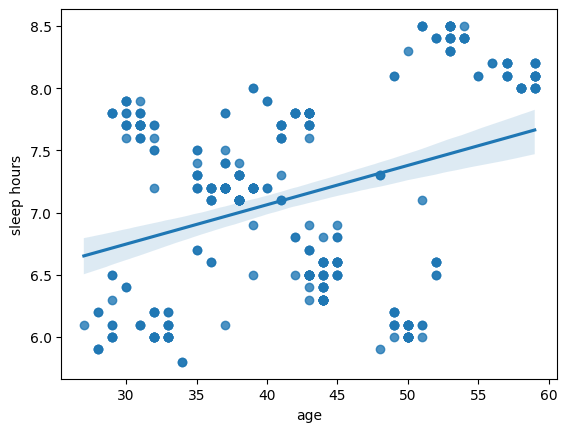

In [43]:
sns.regplot(
    data=health,
    x="age",
    y="sleep_hours"
    
)
plt.xlabel("age")
plt.ylabel("sleep hours")